# Understanding TF-IDF in Natural Language Processing
This notebook covers:
1. What TF-IDF is and its importance in NLP.
2. The mathematics behind TF-IDF.
3. A manual implementation of TF-IDF in Python.
4. Using Scikit-learn's `TfidfVectorizer`.
5. Applications and visualizations.

In [7]:
from collections import Counter
import math
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd

## Section 1: What is TF-IDF?
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects how important a word is to a document in a collection or corpus.

In [8]:
documents = [
    "Messie won the best soccer messie player messie in the messie world prize",
    "TF-IDF meesie stands for Term Frequency-Inverse Document Frequency.",
    "It is a statistical measure used in information retrieval and text mining.",
    "TF measures how frequently a term occurs in a document.",
    "IDF measures how important a term is across all documents.",
    "TF-IDF is often used in search engines and for document similarity tasks.",
]

## Mathematics of TF-IDF
**TF (Term Frequency):** Measures how frequently a term occurs in a document.

**IDF (Inverse Document Frequency):** Measures how unique or important a term is across all documents.

In [9]:
preprocessed_docs = [doc.lower() for doc in documents]

In [10]:
preprocessed_docs[0].split()

['messie',
 'won',
 'the',
 'best',
 'soccer',
 'messie',
 'player',
 'messie',
 'in',
 'the',
 'messie',
 'world',
 'prize']

In [11]:
doc = preprocessed_docs[0]
compute_tf(doc)

{'messie': 0.3076923076923077,
 'won': 0.07692307692307693,
 'the': 0.15384615384615385,
 'best': 0.07692307692307693,
 'soccer': 0.07692307692307693,
 'player': 0.07692307692307693,
 'in': 0.07692307692307693,
 'world': 0.07692307692307693,
 'prize': 0.07692307692307693}

In [6]:
def compute_tf(doc):
    words = doc.split()
    tf = Counter(words)
    total_words = len(words)
    return {word: count / total_words for word, count in tf.items()}

In [ ]:
preprocessed_docs

In [12]:
def compute_idf(docs):
    n_docs = len(docs)
    all_words = set(word for doc in docs for word in doc.split())
    idf = {}
    for word in all_words:
        containing_docs = sum(1 for doc in docs if word in doc.split())
        idf[word] = math.log(n_docs / (1 + containing_docs))  # Add 1 to avoid division by zero
    return idf

In [13]:
tf_list = [compute_tf(doc) for doc in preprocessed_docs]
idf = compute_idf(preprocessed_docs)

In [ ]:
tf_list

In [14]:
idf

{'tasks.': 1.0986122886681098,
 'information': 1.0986122886681098,
 'meesie': 1.0986122886681098,
 'it': 1.0986122886681098,
 'messie': 1.0986122886681098,
 'mining.': 1.0986122886681098,
 'document': 0.6931471805599453,
 'measures': 0.6931471805599453,
 'frequency.': 1.0986122886681098,
 'the': 1.0986122886681098,
 'occurs': 1.0986122886681098,
 'important': 1.0986122886681098,
 'engines': 1.0986122886681098,
 'how': 0.6931471805599453,
 'term': 0.4054651081081644,
 'world': 1.0986122886681098,
 'used': 0.6931471805599453,
 'search': 1.0986122886681098,
 'is': 0.4054651081081644,
 'frequency-inverse': 1.0986122886681098,
 'across': 1.0986122886681098,
 'a': 0.4054651081081644,
 'soccer': 1.0986122886681098,
 'often': 1.0986122886681098,
 'similarity': 1.0986122886681098,
 'documents.': 1.0986122886681098,
 'prize': 1.0986122886681098,
 'and': 0.6931471805599453,
 'tf-idf': 0.6931471805599453,
 'text': 1.0986122886681098,
 'stands': 1.0986122886681098,
 'idf': 1.0986122886681098,
 'won

In [ ]:
tf_list

In [15]:
tf_idf_list = []
for tf in tf_list:
    tf_idf = {word: tf[word] * idf[word] for word in tf.keys()}
    tf_idf_list.append(tf_idf)

In [16]:
tf_idf_list

[{'messie': 0.33803455035941843,
  'won': 0.08450863758985461,
  'the': 0.16901727517970921,
  'best': 0.08450863758985461,
  'soccer': 0.08450863758985461,
  'player': 0.08450863758985461,
  'in': 0.014024735137996508,
  'world': 0.08450863758985461,
  'prize': 0.08450863758985461},
 {'tf-idf': 0.08664339756999316,
  'meesie': 0.13732653608351372,
  'stands': 0.13732653608351372,
  'for': 0.08664339756999316,
  'term': 0.05068313851352055,
  'frequency-inverse': 0.13732653608351372,
  'document': 0.08664339756999316,
  'frequency.': 0.13732653608351372},
 {'it': 0.0915510240556758,
  'is': 0.033788759009013694,
  'a': 0.033788759009013694,
  'statistical': 0.0915510240556758,
  'measure': 0.0915510240556758,
  'used': 0.057762265046662105,
  'in': 0.015193463066162882,
  'information': 0.0915510240556758,
  'retrieval': 0.0915510240556758,
  'and': 0.057762265046662105,
  'text': 0.0915510240556758,
  'mining.': 0.0915510240556758},
 {'tf': 0.10986122886681099,
  'measures': 0.0693147

## Exercise

In [ ]:
documents = [
    "The Solar System consists of the Sun and the objects that orbit it, including eight planets.",
    "Jupiter is the largest planet in the Solar System and has a Great Red Spot.",
    "Saturn is known for its extensive ring system and is the second-largest planet in the Solar System."
]

Take these documents and calculate their tf-idf using the functions above. Write a function that best fits the document that can answer your query.

## Section 2: Using Scikit-learn's TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)

In [30]:
sklearn_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [33]:
preprocessed_docs

['messie won the best soccer messie player messie in the messie world prize',
 'tf-idf meesie stands for term frequency-inverse document frequency.',
 'it is a statistical measure used in information retrieval and text mining.',
 'tf measures how frequently a term occurs in a document.',
 'idf measures how important a term is across all documents.',
 'tf-idf is often used in search engines and for document similarity tasks.']

In [31]:
sklearn_tfidf_df

,across,all,and,best,document,documents,engines,for,frequency,frequently,...,stands,statistical,tasks,term,text,tf,the,used,won,world
0,0.00000,0.00000,0.000000,0.194802,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389604,0.000000,0.194802,0.194802
1,0.00000,0.00000,0.000000,0.000000,0.223564,0.00000,0.000000,0.264802,0.645847,0.000000,...,0.322923,0.000000,0.000000,0.223564,0.000000,0.223564,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.00000,0.270703,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.330119,0.000000,0.000000,0.330119,0.000000,0.000000,0.270703,0.000000,0.000000
3,0.00000,0.00000,0.000000,0.000000,0.305524,0.00000,0.000000,0.000000,0.000000,0.441309,...,0.000000,0.000000,0.000000,0.305524,0.000000,0.305524,0.000000,0.000000,0.000000,0.000000
4,0.38397,0.38397,0.000000,0.000000,0.000000,0.38397,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.265827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.269090,0.000000,0.227184,0.00000,0.328153,0.269090,0.000000,0.000000,...,0.000000,0.000000,0.328153,0.000000,0.000000,0.227184,0.000000,0.269090,0.000000,0.000000


### Visualizing the results

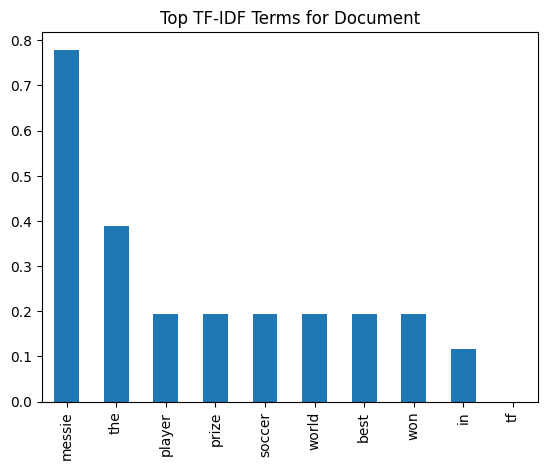

In [19]:
document_idx = 0
tfidf_scores = sklearn_tfidf_df.iloc[document_idx].sort_values(ascending=False).head(10)
tfidf_scores.plot(kind="bar", title="Top TF-IDF Terms for Document")
plt.show()

## Summary
- We manually calculated TF-IDF.
- We used Scikit-learn's `TfidfVectorizer` to streamline the process.
- Visualizations helped interpret the importance of terms within documents.

Exercise: Search Using TF-IDF
Task:
You are given three documents related to the solar system. Your task is to:

1. Preprocess the text.
2. Compute the TF-IDF scores for each word in the documents.
3. Implement a search function where the user inputs a query, and the function returns the document most relevant to the query based on cosine similarity.

# Exercise

In [53]:
documents

['The Solar System consists of the Sun and the objects that orbit it, including eight planets.',
 'Jupiter is the largest planet in the Solar System and has a Great Red Spot.',
 'Saturn is known for its extensive ring system and is the second-largest planet in the Solar System.']

In [54]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

In [55]:
def search(query, tfidf_matrix, vectorizer):
    
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix)    
    print(similarities)
    most_relevant_idx = np.argmax(similarities)
    
    return most_relevant_idx, similarities[0, most_relevant_idx], most_relevant_idx

In [56]:
query = "what is Jupiter?"
most_relevant_idx, score, document_idx = search(query, tfidf_matrix, vectorizer)

print(f"Query: {query}")
print(f"Most relevant document: {documents[most_relevant_idx]}")
print(f"Relevance score: {score:.2f}")
print(f'most relevant document index is {most_relevant_idx}')

[[0.         0.40224083 0.24149657]]
Query: what is Jupiter?
Most relevant document: Jupiter is the largest planet in the Solar System and has a Great Red Spot.
Relevance score: 0.40
most relevant document index is 1


In [39]:
feature_names = vectorizer.get_feature_names_out()  
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=[f"Doc {i+1}" for i in range(len(documents))])

In the course Github repo and the website, please find a zip file called sports_files.zip. The zip contains a few txt files with explanations about different sports. Your task it to write software that receives a query and returns the right document to search for. Do it either using a real API or a simple input prompt.